In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np


## Image Contours
----
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables.
In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.
Let's see how to find contours of a binary image:

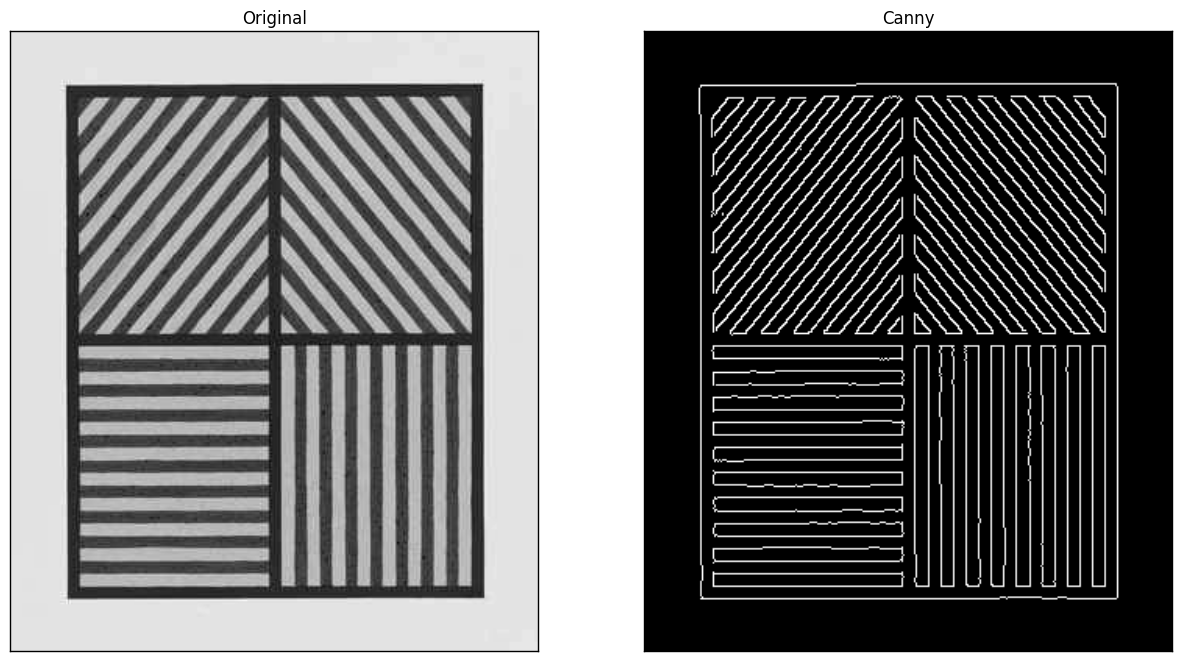

In [2]:
img = cv2.imread('img02.jpeg',0)
canny = cv2.Canny(img,200,250)

plt.figure(figsize = (15,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny, cmap='gray'),plt.title('Canny')
plt.xticks([]), plt.yticks([])

plt.show()

In [4]:
im2, contours, hierarchy = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

There are 03 arguments in cv2.findContours() function

1. __first one is source image,__ 
2. __second is contour retrieval mode,__ 
3. __third is contour approximation method__

It outputs the contours and hierarchy. contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.



## Draw the Contours
To draw the contours, cv2.drawContours function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

To draw all contours


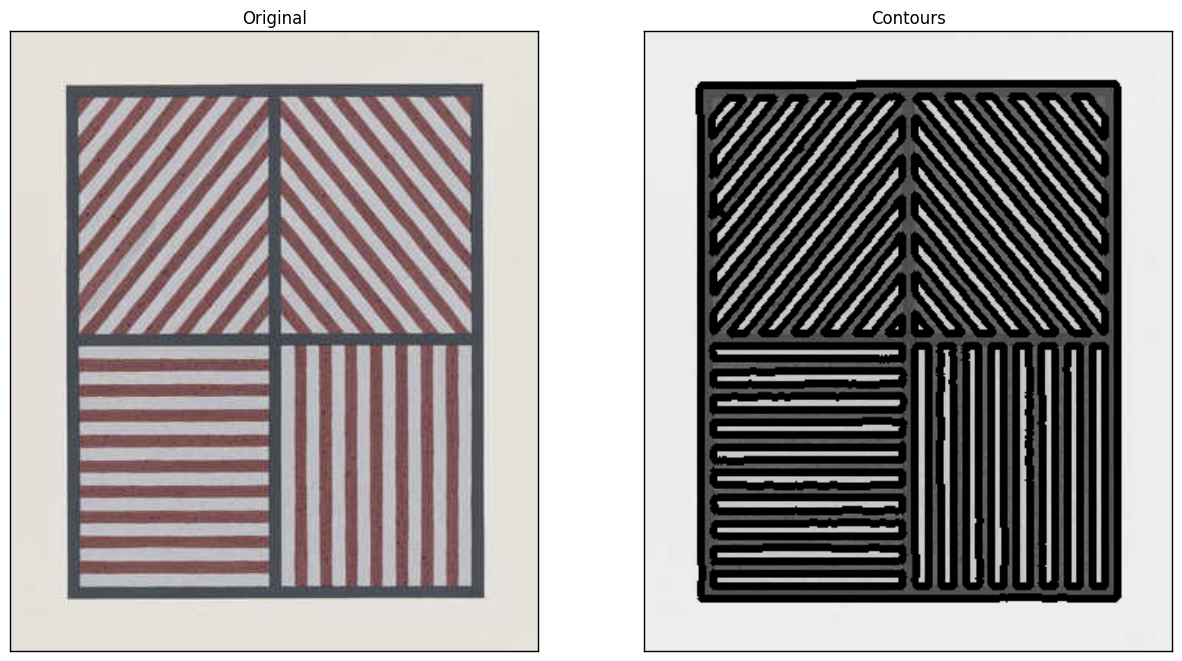

In [6]:
img2 = cv2.cvtColor(cv2.imread('img02.jpeg'), cv2.COLOR_BGR2RGB)

cnt01=cv2.drawContours(img, contours, -1, (0,255,0), 3)

plt.figure(figsize = (15,10))
plt.subplot(121),plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cnt01, cmap='gray'),plt.title('Contours')
plt.xticks([]), plt.yticks([])

plt.show()

## Template Matching
Template Matching is a method for searching and finding the location of a template image in a larger image. 

OpenCV comes with a function cv2.matchTemplate() for this purpose. 
It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. Several comparison methods are implemented in OpenCV. (You can check docs for more details).
It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

If input image is of size (WxH) and template image is of size (wxh), output image will have a size of (W-w+1, H-h+1). 
Once you got the result, you can use cv2.minMaxLoc() function to find where is the maximum/minimum value. 
Take it as the top-left corner of rectangle and take (w,h) as width and height of the rectangle. That rectangle is your region of template.



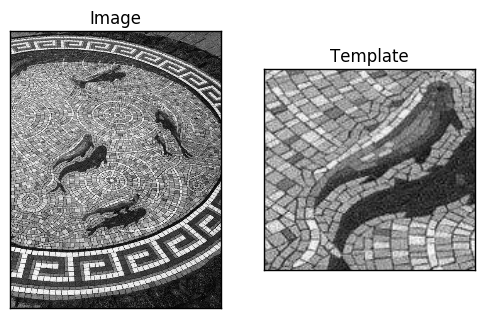

In [7]:
img = cv2.imread('img01.jpg',0)
img2 = img.copy()
template = cv2.imread('template.jpg',0)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(template,cmap = 'gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])
plt.show()

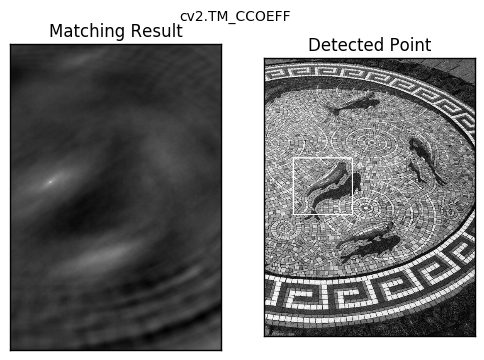

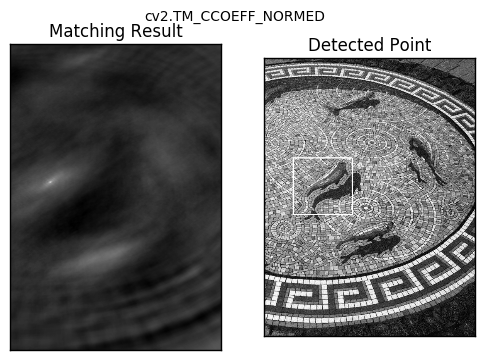

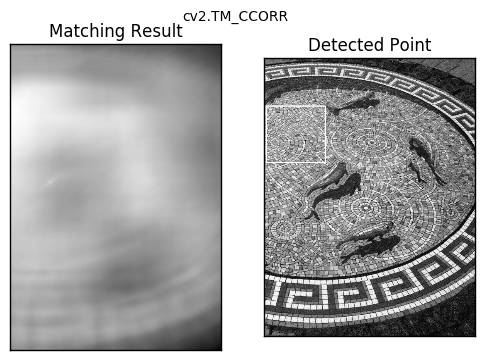

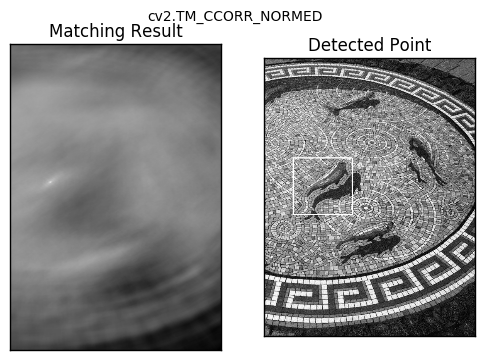

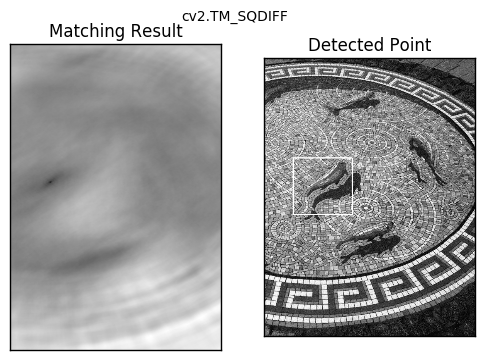

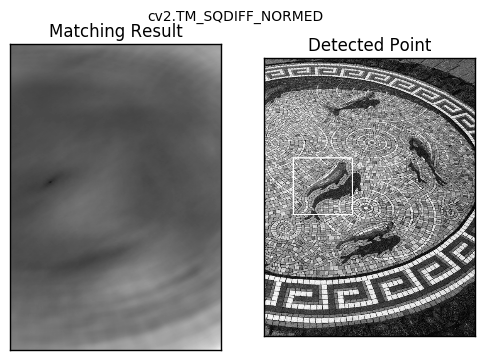

In [13]:
img = cv2.imread('img01.jpg',0)
img2 = img.copy()
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)
 
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [ ]:
cnt = contours[4]
    2 cv2.drawContours(img, [cnt], 0, (0,255,0), 3)